Final Project Check-in 2018-11-16
------

Group Name
-----

 Bean Solution

Student Names
----

1. Xin Sun
2. Zhi Li
3. Minchen Wang
4. Hongdou Li
5. Bowen Ma

Load Data
-----

In [1]:
import pandas as pd
import numpy as np
import time 
import datetime
import scipy.stats

### Pre Join Data

In [2]:
# load inital data
bids = pd.read_csv("bids.csv")
train = pd.read_csv("train.csv")

In [3]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [4]:
train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [5]:
# join the training data set with full data set
bid = pd.merge(train, bids, on='bidder_id', how='left')

In [6]:
# write to file
bid.to_csv("bid.csv")

### Load Joined Data

In [2]:
data = pd.read_csv("bid.csv")
data.head()

,Unnamed: 0,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3


### Data Clean

In [3]:
pd.isnull(data).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id              True
auction             True
merchandise         True
device              True
time                True
country             True
ip                  True
url                 True
dtype: bool

In [4]:
nobids_train = data[pd.isnull(data['bid_id'])]['bidder_id'].unique()
len(nobids_train)

29

**There exist 29 bidder in training data set having no bid data. After checking with their labels, they were all marked as human. Since we aim to detect robot, we will just ignore them.**

In [7]:
pd.isnull(bids).any()

**For the full data set, there are only some of observations missing country entry.**

In [30]:
# for all the missing value observation, drop it
bid = data.dropna()

### Data Exploration

In [9]:
print(f"total row in bid:          {len(bid)}")
print(f"total bids in bid:         {len(bid['bid_id'].unique())}")
print(f"total bidder in bids:      {len(bid['bidder_id'].unique())}")
print(f"total payment in bids:     {len(bid['payment_account'].unique())}")
print(f"total address in bids:     {len(bid['address'].unique())}")
print(f"total auction in bids:     {len(bid['auction'].unique())}")
print(f"total merchandise in bids: {len(bid['merchandise'].unique())}")
print(f"total device in bids:      {len(bid['device'].unique())}")
print(f"total country in bids:     {len(bid['country'].unique())}")
print(f"total ip in bids:          {len(bid['ip'].unique())}")
print(f"total url in bids:         {len(bid['url'].unique())}")

total row in bid:          3068523
total bids in bid:         3068523
total bidder in bids:      1983
total payment in bids:     1983
total address in bids:     1983
total auction in bids:     12740
total merchandise in bids: 10
total device in bids:      5726
total country in bids:     198
total ip in bids:          1028810
total url in bids:         663265


**From this output, we can see the payment and address is one-to-one correspondence, we can igonre these two features.**

In [10]:
print(f"total bids made by robot in train set: {len(bid[bid['outcome'] == 1])}")
print(f"total bids made by human in train set:  {len(bid[bid['outcome'] == 0])}")

total bids made by robot in train set: 412153
total bids made by human in train set:  2656370


**These trainning data set has unbalanced number of robots and human, we need to do undersampling before training the model.**

### Feature Creation

In [31]:
# bidding time difference per user (bidder_id) 
bid = bid.sort_values(by=['time'])
bid['timediffs'] = bid.groupby('bidder_id')['time'].transform(pd.Series.diff)

# number of bids a user made per auction
bids_per_auction  = bid.groupby(['auction','bidder_id']).size()
bids_per_auction = bids_per_auction.to_frame()

# proportion of bots for each country
pbots_country = bid[bid['outcome'] == 1].groupby('country').size()/bid.groupby('country').size() 
pbots_country = pbots_country.fillna(0)
pbots_country = pbots_country.to_frame()

# proportion of bots per device
pbots_device = bid[bid['outcome'] == 1].groupby('device').size()/bid.groupby('device').size()
pbots_device = pbots_device.fillna(0)
pbots_device = pbots_device.to_frame()

# number of unique ip to number of bids ratio
ip_bids_ratio = bid.groupby('bidder_id')['ip'].nunique()/bid.groupby('bidder_id')['bid_id'].nunique()
ip_bids_ratio = ip_bids_ratio.to_frame()

# mean per auction url entropy for each user
# Input a pandas series 
def ent(data):
    p_data= data.value_counts()/len(data) # calculates the probabilities
    entropy=scipy.stats.entropy(p_data)  # input probabilities to get the entropy 
    return entropy

auction_url_entropy = bid.groupby(['auction','bidder_id'])['url'].apply(ent)
auction_url_entropy = auction_url_entropy.groupby('bidder_id').mean().reset_index()

In [32]:
# merge the features back
bid = pd.merge(bid,bids_per_auction, on=['auction','bidder_id'],how='left')
bid = pd.merge(bid,pbots_country, on='country',how='left')
bid = pd.merge(bid,pbots_device, on='device',how='left')
bid = pd.merge(bid,ip_bids_ratio, on='bidder_id',how='left')
bid = pd.merge(bid,auction_url_entropy,on='bidder_id',how='left')
# set column names 
bid.columns = ['Unnamed: 0', 'bidder_id', 'payment_account', 'address', 'outcome',
       'bid_id', 'auction', 'merchandise', 'device', 'time', 'country',
       'ip', 'url', 'timediffs', 'bids_per_auction', 'pbots_country', 'pbots_device', 
               'ip_bids_ratio','auction_url_entropy']

In [33]:
bids = pd.concat([bid.iloc[:,4],bid.iloc[:,-6:]],axis=1) 

## Data visualization

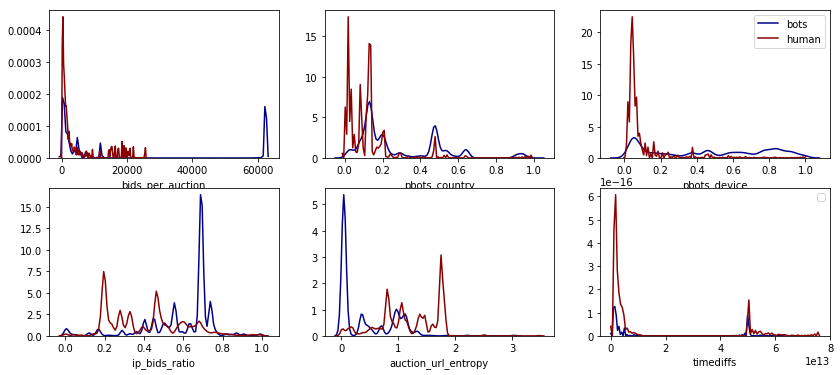

In [8]:
bots = bid.loc[bid.outcome==1]
human = bid.loc[bid.outcome==0]

import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(14, 6), sharex=False)
sns.distplot(bots['bids_per_auction'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])
sns.distplot(human['bids_per_auction'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])

sns.distplot(bots['pbots_country'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 1.5},ax=axes[0, 1])
sns.distplot(human['pbots_country'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5},ax=axes[0,1])

sns.distplot(bots['pbots_device'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', label = 'bots',
             kde_kws={'linewidth': 1.5},ax=axes[0,2])
sns.distplot(human['pbots_device'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', label = 'human',
             kde_kws={'linewidth': 1.5},ax=axes[0,2])

sns.distplot(bots['ip_bids_ratio'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 1.5},ax=axes[1,0])
sns.distplot(human['ip_bids_ratio'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5},ax=axes[1,0])

sns.distplot(bots['auction_url_entropy'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 1.5},ax=axes[1,1])
sns.distplot(human['auction_url_entropy'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5},ax=axes[1,1])

sns.distplot(bots['timediffs'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 1.5},ax=axes[1,2])
sns.distplot(human['timediffs'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5},ax=axes[1,2])
plt.legend(['bots','human'])
plt.show()

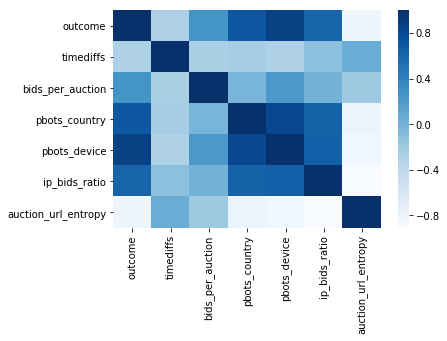

In [34]:
corr_matrix = bids.corr()
## Plot the correlation matrix for the numerical values
import seaborn as sns
sns.heatmap(corr_matrix.corr(), 
        xticklabels=corr_matrix.corr().columns,
        yticklabels=corr_matrix.corr().columns,
           cmap="Blues",
           fmt='d')

In [36]:
# add some interpretation about the above two plots 
# and justify why we need to ignore the variable timediff

Fit scikit-learn model
----

### Split Train and Test set

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
y = bid['outcome']
X = bid.iloc[:,-5:]
bid_train, bid_test= train_test_split(bid, test_size=0.2)

## Under sampling

In [38]:
bots_train = bid_train.loc[bid_train.outcome == 1]
human_train = bid_train.loc[bid_train.outcome == 0]
human_sample = human_train.sample(n=len(bots_train))
bid_train_balance = pd.concat([bots_train,human_sample])

y_train = bid_train_balance['outcome']
X_train = bid_train_balance.iloc[:,-5:]
y_test = bid_test['outcome']
X_test = bid_test.iloc[:,-5:]

### First Model : Decision Tree

In [170]:
from sklearn import tree

In [172]:
from sklearn.model_selection import GridSearchCV
clf = tree.DecisionTreeClassifier()
param_grid = { 
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(3,6),
    'max_leaf_nodes':range(10,15),
    'min_samples_split':range(2,6)
}

clf_cv = GridSearchCV(estimator=clf, 
                      param_grid=param_grid, 
                      cv=5)
clf_cv.fit(X_train, y_train)
print(clf_cv.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 14, 'min_samples_split': 2}


In [173]:
# fit the model
# Decision Tree
kwargs_regularize = dict(criterion='gini',
                         max_depth = 5,
                         max_leaf_nodes=14, 
                         min_samples_split=2)
clf = tree.DecisionTreeClassifier(**kwargs_regularize)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Tree Visualization

In [168]:
from sklearn.externals.six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

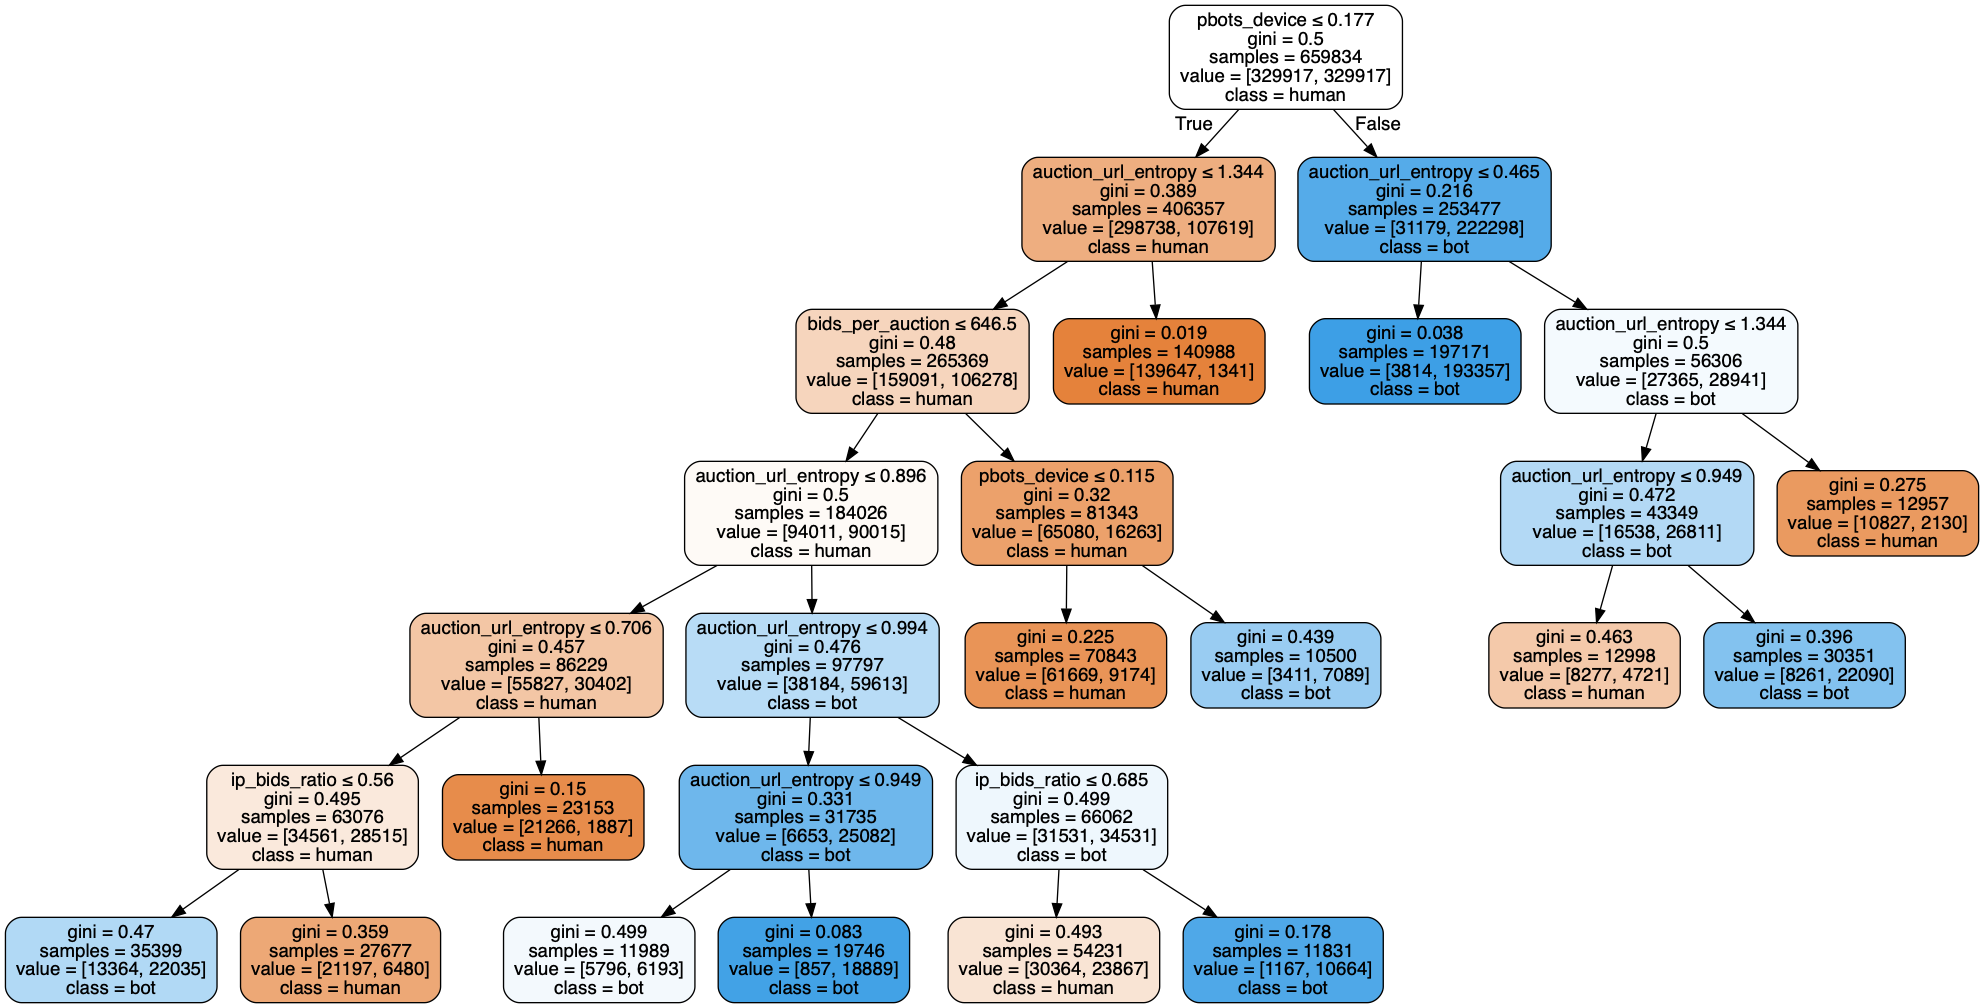

In [174]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
                         filled=True, rounded=True,
                     feature_names=X.columns.values,
                     class_names = ['human','bot'],
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [182]:
graph.write_png("tree.png")

True

Evaluation Metric
----

In [160]:
# predict
y_dt_pred = clf.predict(X_test)

### Accuracy

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
# accuracy score
print(f"Decision Tree Accuracy: {accuracy_score(y_dt_pred, y_test):.3f}")

Decision Tree Accuracy: 0.883


### AUC

In [163]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pylab import rcParams

In [164]:
print('Classification Report of Model 1 Decision Tree')
print(classification_report(y_test, y_dt_pred))

Classification Report of Model 1 Decision Tree
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93    531469
         1.0       0.54      0.85      0.66     82236

   micro avg       0.88      0.88      0.88    613705
   macro avg       0.76      0.87      0.80    613705
weighted avg       0.92      0.88      0.89    613705



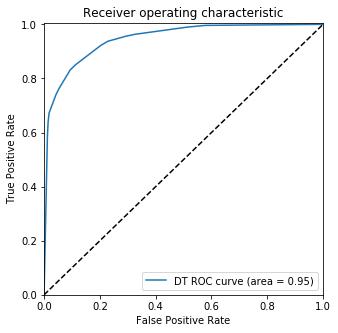

In [165]:
# Plot ROC in one graph
import seaborn as sns
import matplotlib.pyplot as plt
y_dt_score = clf.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _dt = roc_curve(y_test, y_dt_score)
roc_dt_auc = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(5,5))
plt.plot(fpr_dt, tpr_dt, label='DT ROC curve (area = %0.2f)' % roc_dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_dt_auc.png')

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf= RandomForestClassifier(n_estimators=50)
param_grid = { 
    'max_depth': range(3,6),
    'max_leaf_nodes' : range(8,12),
    'max_features':['sqrt','auto','log2']
}

rf_cv = GridSearchCV(estimator=rf, 
                      param_grid=param_grid, 
                      cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

{'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 11}


In [154]:
rf= RandomForestClassifier(n_estimators=100,max_depth=5,
                           max_leaf_nodes=11,max_features='log2', 
                                bootstrap=True,oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=11,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [155]:
from sklearn.metrics import classification_report
y_rf_pred = rf.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_rf_pred, y_test):.3f}")
print(classification_report(y_test,y_rf_pred))

Decision Tree Accuracy: 0.910
              precision    recall  f1-score   support

         0.0       0.98      0.91      0.95    531469
         1.0       0.61      0.88      0.72     82236

   micro avg       0.91      0.91      0.91    613705
   macro avg       0.80      0.90      0.83    613705
weighted avg       0.93      0.91      0.92    613705



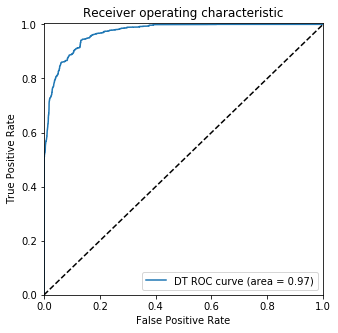

In [156]:
# Plot ROC in one graph
y_rf_score = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test, y_rf_score)
roc_rf_auc = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(5,5))
plt.plot(fpr_rf, tpr_rf, label='DT ROC curve (area = %0.2f)' % roc_rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_rf_auc.png')

## Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
gb = GradientBoostingClassifier(n_estimators=10)
param_grid = { 
    'max_depth': range(3,6),
    'max_leaf_nodes' : range(8,11)
}

gb_cv = GridSearchCV(estimator=gb, 
                      param_grid=param_grid, 
                      cv=5)
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)

{'max_depth': 5, 'max_leaf_nodes': 9}


In [150]:
gb = GradientBoostingClassifier(n_estimators=100,max_depth=5,max_features='sqrt',
                                 max_leaf_nodes=9)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=9,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [151]:
y_gb_pred = gb.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_gb_pred, y_test):.3f}")
print(classification_report(y_test,y_gb_pred))

Decision Tree Accuracy: 0.979
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    531469
         1.0       0.88      0.98      0.93     82236

   micro avg       0.98      0.98      0.98    613705
   macro avg       0.94      0.98      0.96    613705
weighted avg       0.98      0.98      0.98    613705



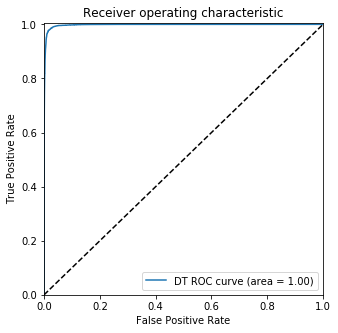

In [152]:
# Plot ROC in one graph
y_gb_score = gb.predict_proba(X_test)[:,1]
fpr_gb, tpr_gb, _gb = roc_curve(y_test, y_gb_score)
roc_gb_auc = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(5,5))
plt.plot(fpr_gb, tpr_gb, label='DT ROC curve (area = %0.2f)' % roc_gb_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_gb_auc.png')

## Compare Different Models

In [125]:
from sklearn import metrics
dt_metrics = [metrics.accuracy_score(y_test,y_dt_pred),metrics.precision_score(y_test,y_dt_pred),
     metrics.recall_score(y_test,y_dt_pred),metrics.f1_score(y_test,y_dt_pred),
     metrics.roc_auc_score(y_test,y_dt_pred)]
rf_metrics = [metrics.accuracy_score(y_test,y_rf_pred),metrics.precision_score(y_test,y_rf_pred),
     metrics.recall_score(y_test,y_rf_pred),metrics.f1_score(y_test,y_rf_pred),
     metrics.roc_auc_score(y_test,y_rf_pred)]
gb_metrics = [metrics.accuracy_score(y_test,y_gb_pred),metrics.precision_score(y_test,y_gb_pred),
     metrics.recall_score(y_test,y_gb_pred),metrics.f1_score(y_test,y_gb_pred),
     metrics.roc_auc_score(y_test,y_gb_pred)]

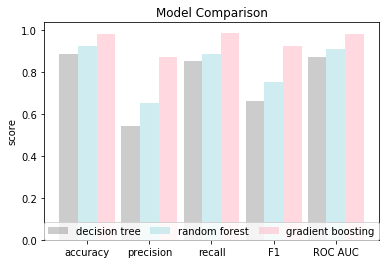

In [148]:
fig, ax = plt.subplots()
index = np.arange(5)
width = 0.3
b1 = plt.bar(index, dt_metrics, width, alpha=0.4, color='grey', label='decision tree')
b2 = plt.bar(index+width, rf_metrics, width, alpha=0.6, color='powderblue', label='random forest')
b3 = plt.bar(index+2*width, gb_metrics, width, alpha=0.6, color='pink', label='gradient boosting')
plt.title('Model Comparison')
plt.ylabel('score')
plt.xticks(index+width,('accuracy','precision','recall','F1','ROC AUC'))
plt.legend(loc=8,ncol=3, mode="expand", borderaxespad=0.)
plt.show()
fig.savefig('model_comparison.png')